# k-Nearest Neighbor (kNN) exercise

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic classification pipeline, and cross-validation.

## Instructions for All Labs
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Some markdown cells contain questions.
  * For questions <span style="color:red;">colored in red</span>, you must submit your answers in the corresponding Assignment in the course page. Make sure that you enter your responses in the item with the matching question code. Answers that do not follow the prescribed format will automatically be marked wrong by the checker.
  * For questions <span style="color:green;">colored in green</span>, you don't have to submit your answers, but you must think about these questions as they will help enrich your understanding of the concepts covered in the labs.
* You are expected to search how to some functions work on the Internet or via the docs.
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

Run some setup code for this notebook:

In [ ]:
import random
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
# Makes matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Playing with a small dataset

Let's create a simple dataset and see how a kNN classifier will classify it. In this exercise, let's have two class labels 0 and 1, or y = {0,1}

Let's first create the X (features) of y=0. We can do this by randomly choosing datapoints with the function `np.random.randn()`:
```python
np.random.randn(rows, cols) * variance + mean
```

Create 10 entries (rows) with 2 features (columns: x and y coordinates) for `y=0`. Set the mean to 3 and variance to 1.5. Assign the return value to variable `X_train_zeros`.

In [ ]:
np.random.seed(0)

# Write your code here

mean = 3
variance = 1.5
X_train_zeros = np.random.randn(10, 2) * variance + mean




Create 10 entries (rows) with 2 features (columns) for `y=1`. Set the mean to 1 and variance to 1.5. Assign the return value to variable `X_train_ones`.

In [ ]:
np.random.seed(0)

# Write your code here
mean = 1
variance = 1.5
X_train_ones = np.random.randn(10, 2) * variance + mean



Print the generated numbers.

In [ ]:
print("Class 0 \n" + str(X_train_zeros))
print("Class 1 \n" + str(X_train_ones))

Class 0 
[[5.64607852 3.60023581]
 [4.46810698 6.3613398 ]
 [5.80133699 1.53408318]
 [4.42513263 2.77296419]
 [2.84517172 3.61589775]
 [3.21606536 5.18141026]
 [4.14155659 3.18251252]
 [3.66579485 3.50051149]
 [5.24111861 2.6922626 ]
 [3.46960155 1.71885639]]
Class 1 
[[ 3.64607852  1.60023581]
 [ 2.46810698  4.3613398 ]
 [ 3.80133699 -0.46591682]
 [ 2.42513263  0.77296419]
 [ 0.84517172  1.61589775]
 [ 1.21606536  3.18141026]
 [ 2.14155659  1.18251252]
 [ 1.66579485  1.50051149]
 [ 3.24111861  0.6922626 ]
 [ 1.46960155 -0.28114361]]


### Visualize
Plot the generated data in a chart using the function `plt.plot()`.

Format: `plt.plot(x, y, character/symbol)`.

`X_train_zeros[:, col]` gets all the rows and column col. The `bo` parameter marks these points as blue circles. The `ro` parameter marks these points as red circles

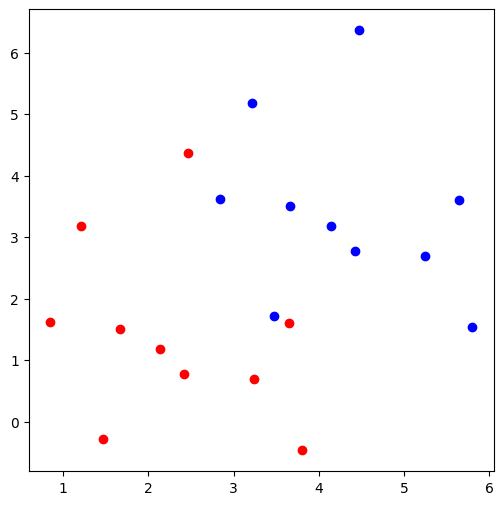

In [ ]:
plt.plot(X_train_zeros[:, 0], X_train_zeros[:, 1], 'bo')
plt.plot(X_train_ones[:, 0], X_train_ones[:, 1], 'ro')

So far, our data D has been split to 2 classes. Let's collate them into one `X_train`, and create `y_train` for the labels.

Combine `X_train_zeros` with `X_train_ones` to a single matrix. Use the function `np.concatenate()` to combine the two matrices. Assign the return value to variable `X_train`.

In [ ]:
# Write your code here
X_train = np.concatenate((X_train_zeros, X_train_ones), axis = 0)

### Labels

Create an array of 10 zeros for the first class `y=0`. Instead of manually creating an array, use the function `np.zeros()`. Assign the return value to variable `y_train_zeros`.

In [ ]:
# Write your code here
y_train_zeros = np.zeros(10)

Create an array of 10 ones for the first class `y=1`. Instead of manually creating an array, use the function `np.ones()`. Assign the return value to variable `y_train_ones`.

In [ ]:
# Write your code here
y_train_ones = np.ones(10)

Combine `y_train_zeros` with `y_train_ones` to a single array. Use the function `np.concatenate()` to combine the two arrays. Assign the return value to variable `y_train`.

In [ ]:
# Write your code here
y_train = np.concatenate((y_train_zeros, y_train_ones), axis = 0)

Display the dataset.

In [ ]:
print("Our data set:")
print("Features (X) \t\t Label (y)")
for i in range(len(y_train)):
    print(str(X_train[i]) + " " + str(y_train[i]))

Our data set:
Features (X) 		 Label (y)
[5.64607852 3.60023581] 0.0
[4.46810698 6.3613398 ] 0.0
[5.80133699 1.53408318] 0.0
[4.42513263 2.77296419] 0.0
[2.84517172 3.61589775] 0.0
[3.21606536 5.18141026] 0.0
[4.14155659 3.18251252] 0.0
[3.66579485 3.50051149] 0.0
[5.24111861 2.6922626 ] 0.0
[3.46960155 1.71885639] 0.0
[3.64607852 1.60023581] 1.0
[2.46810698 4.3613398 ] 1.0
[ 3.80133699 -0.46591682] 1.0
[2.42513263 0.77296419] 1.0
[0.84517172 1.61589775] 1.0
[1.21606536 3.18141026] 1.0
[2.14155659 1.18251252] 1.0
[1.66579485 1.50051149] 1.0
[3.24111861 0.6922626 ] 1.0
[ 1.46960155 -0.28114361] 1.0


__Your output should look like this:__
```
Our data set:
Features (X) 		 Label (y)
[5.64607852 3.60023581] 0.0
[4.46810698 6.3613398 ] 0.0
[5.80133699 1.53408318] 0.0
...
[1.66579485 1.50051149] 1.0
[3.24111861 0.6922626 ] 1.0
[ 1.46960155 -0.28114361] 1.0
```

`X_train` and `y_train` should be of length 20.

### Create a test case
Let's add in a single test case to see how it will be classified by kNN.

In [ ]:
X_test = np.array([[3, 3.5]])

There's a reason why this is an array inside an array. Each data point is represented by an array (currently an array of length 2). Right now, there is only one test data, but soon we may have more than one.

Make a function that will plot the data from `y=0` with blue circles, and plot the data from `y=1` with red circles.

In [ ]:
def plot_train_data(train_zeros, train_ones):
    # Write your code here
    plt.scatter(train_zeros[:, 0], train_zeros[:, 1], color='blue', label='y=0', marker='o')
    plt.scatter(train_ones[:, 0], train_ones[:, 1], color='red', label='y=1', marker='o')
    plt.xlabel('X1 (Feature 1)')
    plt.ylabel('X2 (Feature 2)')
    plt.title('Training Data Points for y=0 and y=1')
    plt.legend()
    plt.grid(True)
    pass

Call the function `plot_train_data()`.

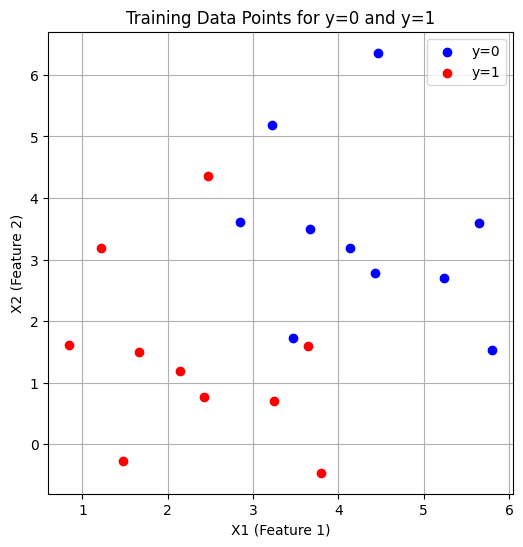

In [ ]:
# Write your code here
plot_train_data(X_train_zeros, X_train_ones)

Make a function that will plot the test case (it should appear as a black plus sign).

In [ ]:
def plot_test_data(test):
    plt.scatter(test[0, 0], test[0, 1], color='black', marker='+', s=100, label='Test case')

    plt.xlabel('X1 (Feature 1)')
    plt.ylabel('X2 (Feature 2)')
    plt.title('Test Data Point')
    plt.legend()
    plt.grid(True)


Call the function `plot_test_data()`.

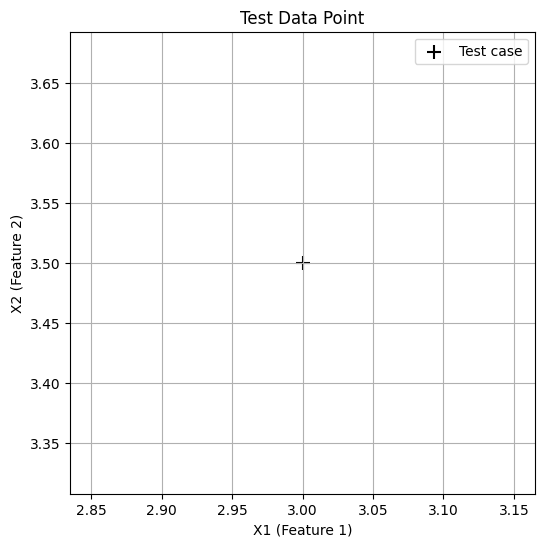

In [ ]:
# Write your code here
plot_test_data(X_test)

Display both the train and the test data.

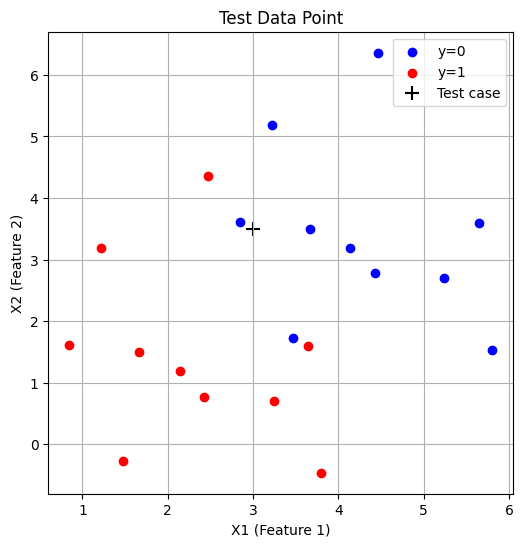

In [ ]:
# Write your code here

plot_train_data(X_train_zeros, X_train_ones)

plot_test_data(X_test)

<span style="color:red;">**Question 1-1**: Given the visualization, what should be the label of the test data?</span>

kNN gets the k nearest data points of the test case. Let's envision which nearby data points will be the nearest to our test case.

Let's place in a radius/distance for the circle.

In [ ]:
radius = 0.35

Then, we will use this variable to draw in a circle around our test data.

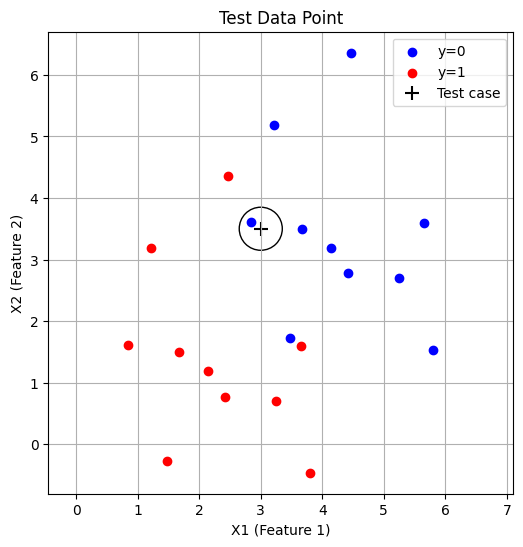

In [ ]:
plot_train_data(X_train_zeros, X_train_ones)
plot_test_data(X_test)

circle = plt.Circle((X_test[:, 0], X_test[:, 1]), radius, color='k', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.axis('equal')
ax.add_artist(circle)

<span style="color:red;">**Question 1-2**: Adjust the radius until it has more than 1 data point. How will you label the new test data?</span>

## Using scikit to create a k-nearest neighbors classifier

Now, we'll use `sklearn.neighbors.KNeighborsClassifier`.

Import the `KNeighborsClassifier` class.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Instantiate a `KNeighborsClassifier` object. Assign the object to variable `model`.

In [ ]:
# Write your code here
model = KNeighborsClassifier()

Train the model by calling the function `fit()`.

In [ ]:
# Write your code here
model.fit(X_train, y_train)

KNeighborsClassifier()

Test the model by calling the function `predict()`.

In [ ]:
# Write your code here
model.predict(X_test)

array([0.])

The output should be the label of the data point nearest the test data. If the closest data point is blue it should say 0, and 1 if red. We highlighted the need for train results yet we do not call our model to predict on `X_train`.

## Getting k Neighbors
We could also get the k-nearest neighbors. Let's set the number of neighbors as 5.

In [ ]:
neighbors = 5

Use the function `kneighbors()` of the model to get the actual neighbors that are similar to our test data. Assign the return values to variables `distances` and `data_index`

In [ ]:
# Write your code here
distances, data_index = model.kneighbors(X_test, neighbors)

Display the top neighbors of the test data.

In [ ]:
distances = np.squeeze(distances)
data_index = np.squeeze(data_index)

print("The " + str(neighbors) + " nearest neighbors:")
for i in range(neighbors):
    print(i + 1, np.around(X_train[data_index[i]], 2), "\t dist: "+ str(np.around(distances[i], 2)))

The 5 nearest neighbors:
1 [2.85 3.62] 	 dist: 0.19
2 [3.67 3.5 ] 	 dist: 0.67
3 [2.47 4.36] 	 dist: 1.01
4 [4.14 3.18] 	 dist: 1.18
5 [4.43 2.77] 	 dist: 1.6


<span style="color:red;">**Question 1-3**: What is the distance of the test data from the top 1 nearest neighbor? Limit to 2 decimal places.</span>

To check the labels of the k nearest neighbors, we just apply the index onto `y_train`.

In [ ]:
y_train[data_index]

array([0., 0., 1., 0., 0.])

<span style="color:red;">**Question 1-4**: What is the class of the test case?</span>

## Hyperparameter k

By now, you would have noticed that the value of *k* will affect the result the result of the classifier. Choosing a good *k* is important, and we can do sample runs to see which *k* works best for us.

*Hyperparameters* like *k* affect how the model learns, and are usually "set" before modelling begins. They are different from regular *parameters* in a model. They are normally considered "higher level" because they also help estimate model *parameters*. *Parameters* can be estimated by some analytic solution based on the data, while *hyperparameters* can not. Since knn is non-parametric, we haven't encountered any *parameters* yet.

In `KNeighborsClassifier`, we can control the value of *k*, too.

Let's add in a single test case to see how it will be classified by kNN.

In [ ]:
X_test = [[2, 2]]

Instantiate a `KNeighborsClassifier` object. Set the number of neighbors to 5. Assign the object to variable `model`.

In [ ]:
# Write your code here
model = KNeighborsClassifier(n_neighbors=5)

Train the model.

In [ ]:
# Write your code here
model.fit(X_train, y_train)

KNeighborsClassifier()

Test the model.

In [ ]:
# Write your code here
model.predict(X_test)

array([1.])

<span style="color:red;">**Question 1-5**: What is the class of the test case given that `k` is set to 5?</span>

### Test Data
So far, we only have one test case. But we can test more than one sample data at a time, we just need to populate more samples in our `X_test`.

In [ ]:
X_test = [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]

Test the model.

In [ ]:
# Write your code here
model.predict(X_test)

array([1., 1., 1., 0., 0.])

The output should be an array with `n` elements, where `n` is the size of `X_test`. The predictions will come in the same order.

<span style="color:red;">**Question 1-6**: What is the predicted class of the second instance in the test set?</span>

## Evaluating the performance

In reality, our validation/test data will have proper labels/ground truths to compare our model's predictions with.

Here, we will define `y_test` which are the ground truth labels of our `X_test` data. Note that `X_test` and `y_test` should have the same length.

In [ ]:
X_test = [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]
y_test = [     1,      1,      1,      0,     0]

Predict the classes of the test set and assign the return value to variable `y_predicted`.

In [ ]:
# Write your code here
y_predicted = model.predict(X_test)

Import the function `accuracy_score()` and the function `classification_report()` to evaluate the performance of our model.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

Print out the performance metrics given the actual results vs the predictions.

In [ ]:
# Write your code here
print("Accuracy: " + str(accuracy_score(y_test, y_predicted)))
print(classification_report(y_test, y_predicted))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



<span style="color:red;">**Question 1-7**: What is the accuracy of our model on the test set? Answer should be a real number from 0.0 to 1.0. Limit to 2 decimal places.</span>

### Split data set
We don't need to manually split our training data from test data. Most of the time, manually splitting your data will be a source of partiality because you may un/consciously be choosing "good" or "easy-to-predict" data for the model to predict.

`sklearn` also has a module that allows us to easily split our data intro training and testing data.

Combine `X_train` and `X_test` and assign it to variable `X`.

In [ ]:
# Write your code here
X = np.concatenate((X_train, X_test), axis=0)

Combine `y_train` and `y_test` and assign it to variable `y`.

In [ ]:
# Write your code here
y = np.concatenate((y_train, y_test), axis=0)

Import the function `train_test_split()`.

In [ ]:
from sklearn.model_selection import train_test_split

Use the function `train_test_split()` to split the data into train and test sets. Make the test size 33% of the entire data. Set the `random_state` to 1. Assign the return value to the variable `all_sets`.

In [ ]:
all_sets = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = all_sets

print("X train: \n" + str(X_train))
print("y train: \n" + str(y_train))
print("X test: \n" + str(X_test))
print("y test: \n" + str(y_test))

X train: 
[[ 5.80133699  1.53408318]
 [ 0.          0.        ]
 [ 4.14155659  3.18251252]
 [ 3.66579485  3.50051149]
 [ 2.          2.        ]
 [ 4.46810698  6.3613398 ]
 [ 2.14155659  1.18251252]
 [ 5.64607852  3.60023581]
 [ 1.21606536  3.18141026]
 [ 4.          4.        ]
 [ 3.          3.        ]
 [ 3.46960155  1.71885639]
 [ 5.24111861  2.6922626 ]
 [ 3.80133699 -0.46591682]
 [ 2.46810698  4.3613398 ]
 [ 3.21606536  5.18141026]]
y train: 
[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
X test: 
[[ 0.84517172  1.61589775]
 [ 2.42513263  0.77296419]
 [ 1.66579485  1.50051149]
 [ 4.42513263  2.77296419]
 [ 1.          1.        ]
 [ 3.64607852  1.60023581]
 [ 3.24111861  0.6922626 ]
 [ 1.46960155 -0.28114361]
 [ 2.84517172  3.61589775]]
y test: 
[1. 1. 1. 0. 1. 1. 1. 1. 0.]


Do you think we will come up with a different result if we had a different train and test set?

<span style="color:red;">**Question 1-8**: How many instances belong to class `1` in the resulting training set?</span>

A: 6

And, then do modelling like normal. Create a knn classifier with a k of 3.

Instantiate a `KNeighborsClassifier` object with `k` set to 3. Assign the object to variable `model`.

In [ ]:
# Write your code here
model = KNeighborsClassifier(n_neighbors=3)

Train the model.

In [ ]:
# Write your code here
model = model.fit(X_train, y_train)

Predict the classes of the test set and assign the return value to variable `y_predicted`.

In [ ]:
# Write your code here
y_predicted = model.predict(X_test)

Get the accuracy of the model.

In [ ]:
# Write your code here
print(accuracy_score(y_test, y_predicted))

0.8888888888888888


<span style="color:red;">**Question 1-9**: What is the accuracy of our model on the test set? Answer should be a real number from 0.0 to 1.0. Limit to 2 decimal places.</span>

## Cross validation

Cross validation is a type of validation technique that suits smaller datasets. We will discuss more about validation and cross validation in our lecture on Regularization.

__What does cross validation do?__
Cross validation is a kind of splitting similar to what we did in the cells before. Cross validation will give us `k` train and validation data. It does in such a way that each data point will eventually become a validation data.

> The `k` in `k`-fold cross validation is different from `k` nearest neighbors

To avoid confusion, we will explicitly call the `k` in `k` nearest neighbors as the hyperparameter `k`, and call the `k` in `k`-fold as `k-fold`/`s`.

Cross validation is an alternative to split testing where we never shuffle train and test together in further experiments. It is a good option if you have few data points, and you cannot afford to lose any data as test data.

__Determining hyperparameters.__ Validation is also a way for us to determine a good value for our *k* in k-nearest neighbors. Instead of blindly choosing our hyperparameter, we will do multiple experiments using cross validation to see which one will give us the best results.

> Right now, we are switching between *validation* and *test* data in the text. For now, we will treat them similarly. But just know that they are two different things.

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

The function `cross_val_predict()` does the data splitting, the training, and the cross-validation. Try getting the predictions using a `k-fold` of 10 and assign the return value to variable `predictions`.

In [ ]:
# Write your code here
predictions = cross_val_predict(model, X, y, cv=10)

Get the accuracy of the model.

In [ ]:
# Write your code here
accuracy = accuracy_score(y, predictions)
print("Accuracy: " + str(accuracy))

Accuracy: 0.88


You may also use the function `cross_val_score()` to get the actual accuracy from each fold in the k-fold cross validation, where `k-fold` is 10, and assign the return value to variable `scores`.

In [ ]:
# Write your code here
scores = cross_val_score(model, X, y, cv=10)

Print the scores per fold (experiment).

In [ ]:
print("Scores per fold :\n" + str(scores))
print("Average accuracy : " + str(np.sum(scores) / len(scores)))

Scores per fold :
[0.66666667 0.66666667 1.         1.         1.         1.
 1.         0.5        1.         1.        ]
Average accuracy : 0.8833333333333332


<span style="color:red;">**Question 1-10:** What is the average accuracy of the 10 folds? Express the answer in decimal, not percentage. Round off to two decimal places.</span>

## Training with a real-world dataset (cifar-10)

*This part of the exercise is a modified version of the exercise from cs231n class at Stanford University.

In this section of the exercise, we will be training a classifier on the `cifar-10` dataset. The `cifar-10` dataset is an image dataset thata consists of `60,000` `32x32` colored images separated into 10 classes (`6,000` images per class):
* plane
* car
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Our task is to train a kNN classifier to accept an image input and determine which among the 10 classes listed above the image belongs to.

To continue with this portion of the notebook, please download the `cifar-10` dataset from this link: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz.

You can read more about `cifar-10` here: https://www.cs.toronto.edu/~kriz/cifar.html

### Loading the cifar-10 data
Let's start by loading our data.

These functions are used to load the `cifar` batch data. Take note that this is not how we normally load image data but we are doing so because of the `cifar` batches are designed.

In [ ]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']

        # This code reformats the data back to the 10,000 32x32 colored image format (multiplied by 6 batches)
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)

        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    X_train = np.concatenate(xs)
    Y_train = np.concatenate(ys)
    del X, Y
    X_test, Y_test = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return X_train, Y_train, X_test, Y_test

Make sure that the `cifar-10` folder is in the same directory as this notebook. If the name or path of the folder is different, adjust it accordingly.

In [ ]:
cifar10_dir = 'cifar-10/'

In [ ]:
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Print out the sizes of the training and test data.

In [ ]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (16, 2)
Training labels shape:  (16,)
Test data shape:  (9, 2)
Test labels shape:  (9,)


Our training and test data is in the shape of `(50000, 32, 32, 3)` and `(10000, 32, 32, 3)`. The first number in the tuple, i.e., 50000 and 10000, refers to the number of images in the train and test set, respectively. The second and third number in the tuple, i.e., 32 and 32, refers to the width and the height of the image, respectively. The last number in the tuple, i.e., 3 and 3, refers to the number of channels.

### Visualize
Let's visualize some examples from the dataset.  We show a few examples of training images from each class.

`y_train` currently lists the classes as numbers from `0-9`. They are mapped to the its named labels as so:

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

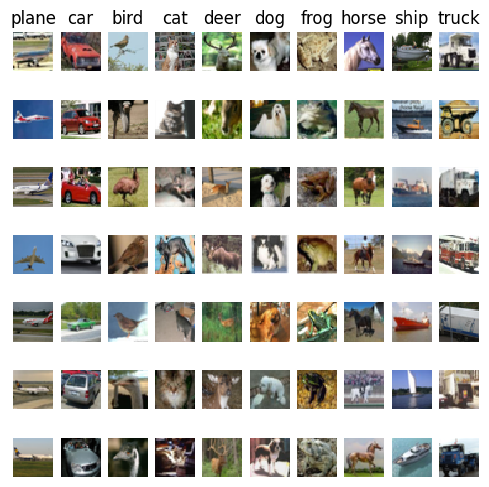

In [ ]:
num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        # show items in column (per class)
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

While we can use all 60,000 images to train and test our model, we also want to be time and memory efficient and not torture our machine. For the purposes of this exercise, we will just subsample our total data.

**Note**: You can use all 60,000 images but do so at your own peril.

This will be our new training and test data count:

In [ ]:
num_training = 5000
num_test = 500

We use this new count to mask our data. The `mask` in the code below is just an array from `0` to `num_training` and `num_test`. By applying the mask, we are getting getting the first `5,000` and first `500` images from our training and test data.

In [ ]:
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

Before you do this next time, please know that your masked data should be stratified or representative of the overall data. Fortunately, cifar is arranged in a way that makes this type of masking work.

Below, we can see that the histogram of `y_train` and `y_test` has around the same number of instances/images per class:

(array([505., 460., 519., 486., 519., 488., 519., 486., 520., 498.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

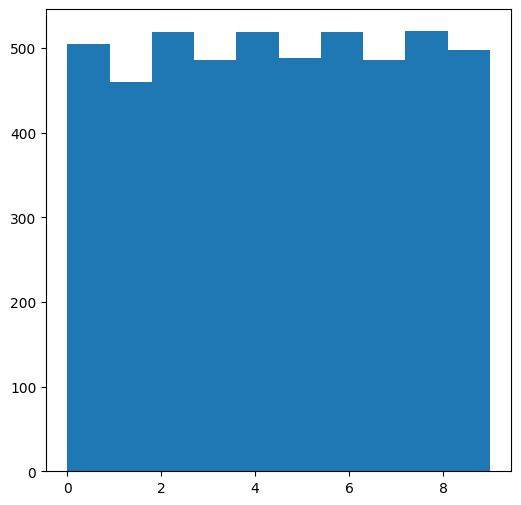

In [ ]:
plt.hist(y_train)

(array([57., 41., 51., 49., 40., 48., 54., 47., 57., 56.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

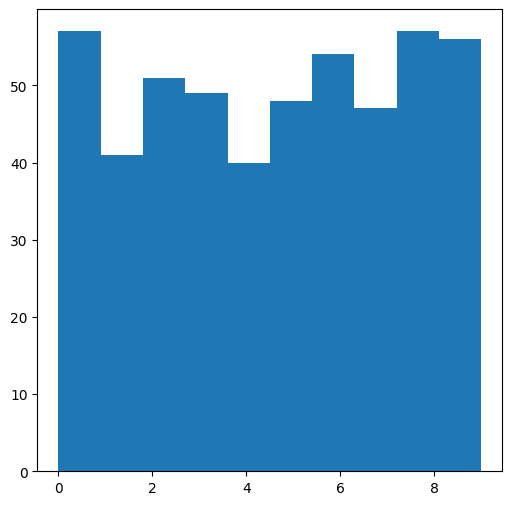

In [ ]:
plt.hist(y_test)

**Note:** We could make it more even, but this is balanced enough for this exercise.

### Reformatting our data

Most machine learning models expect a certain format of its input: a single instance/entry is represented as a (1-dimensional) vector. Unfortunately, one instance/image in our `cifar` dataset is currently in a 3-d structure (32x32x3). To force our images to be accepted by kNN, we will have to reshape them in a way to make them 1-d.

We can do this by laying the pixels (and its channels) end-to-end to create a single vector. Fortunately, this is very easy to implement with `np.reshape()`.

Perform the reshaping of `X_train` to a single vector using the function `reshape()` and assign the return value to the variable `X_train`.

In [ ]:
# Write your code here
X_train = np.reshape(X_train, (X_train.shape[0], -1))

Perform the reshaping of `X_test` to a single vector using the function `reshape()` and assign the return value to the variable `X_test`.

In [ ]:
# Write your code here
X_test = np.reshape(X_test, (X_test.shape[0], -1))

<span style="color:red;">**Question 1-11:** What is our target shape of `X_train`?</span>

<span style="color:red;">**Question 1-12:** What is our target shape of `X_test`?</span>

### Training our `cifar-10` classifier

Instantiate a `KNeighborsClassifier` object. Set the number of neighbors to 5. Assign the object to variable `model`.

In [ ]:
# Write your code here
model = KNeighborsClassifier(n_neighbors=5)

Train the model.

In [ ]:
# Write your code here
model.fit(X_train, y_train)

KNeighborsClassifier()

Predict the classes of the test set and assign the return value to variable `y_predicted`.

In [ ]:
# Write your code here
y_predicted = model.predict(X_test)


Use the function `classification_report()` to get the evaluation metric per class. The correct name of the class should be shown, not the corresponding number.

In [ ]:
# Write your code here
print(classification_report(y_test, y_predicted, target_names=classes))

              precision    recall  f1-score   support

       plane       0.29      0.49      0.36        57
         car       0.56      0.12      0.20        41
        bird       0.24      0.57      0.34        51
         cat       0.26      0.12      0.17        49
        deer       0.13      0.35      0.19        40
         dog       0.29      0.10      0.15        48
        frog       0.41      0.22      0.29        54
       horse       0.50      0.04      0.08        47
        ship       0.38      0.58      0.46        57
       truck       0.62      0.09      0.16        56

    accuracy                           0.28       500
   macro avg       0.37      0.27      0.24       500
weighted avg       0.37      0.28      0.25       500



<span style="color:red;">**Question 1-13**: What is the accuracy of our model on the test set? Answer should be a real number from 0.0 to 1.0. Limit to 2 decimal places.</span>

### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the hyperparameter value `k = 5` arbitrarily. __We will now determine the best value of this hyperparameter with cross-validation.__

Use the function `sklearn.model_selection.cross_val_score()` to do this.

In [ ]:
from sklearn.model_selection import cross_val_score

We set the `k_folds` value to 5

In [ ]:
k_folds = 5

And, we will give an array of choices for the hyperparameter `k`.

In [ ]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

Our goal here is to keep a matrix called `scores` where each row corresponds to a hyperparameter `k`, and each column is the validation score for that fold.

The final `scores` matrix will look like this:

|     k | `k_fold=1` | `k_fold=2` | `k_fold=3` | `k_fold=4` | `k_fold=5` |
|------:|----------|----------|----------|----------|----------|
|   `k=1` | 0.269    | 0.246    | 0.273    | 0.283    | 0.264    |
|   `k=3` | 0.247    | 0.24     | 0.243    | 0.269    | 0.245    |
|   `k=5` | 0.258    | 0.251    | 0.285    | 0.288    | 0.271    |
|   `k=8` | 0.273    | 0.274    | 0.285    | 0.294    | 0.271    |
|  `k=10` | 0.277    | 0.287    | 0.286    | 0.283    | 0.275    |
|  `k=12` | 0.274    | 0.282    | 0.283    | 0.286    | 0.277    |
|  `k=15` | 0.261    | 0.278    | 0.28     | 0.286    | 0.274    |
|  `k=20` | 0.281    | 0.269    | 0.282    | 0.281    | 0.28     |
|  `k=50` | 0.278    | 0.268    | 0.286    | 0.27     | 0.264    |
| `k=100` | 0.267    | 0.258    | 0.273    | 0.261    | 0.265    |

For now we will just set the `scores` matrix to 0s.

In [ ]:
scores = np.zeros((len(k_choices), k_folds))

Now that we have set those variables, we can start creating models with varying values for the hyperparameter `k`.

In [ ]:
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    # Write your code here
    model = KNeighborsClassifier(n_neighbors=k_choices[i])
    scores[i] = cross_val_score(model, X_train, y_train, cv=k_folds)
    pass

k is : 1
k is : 3
k is : 5
k is : 8
k is : 10
k is : 12
k is : 15
k is : 20
k is : 50
k is : 100


__Sanity check :__ Don't worry. Running this really takes some time.

### Choosing the best hyperparameter `k`

To choose the best hyperparameter `k`, let's try to visualize the results.

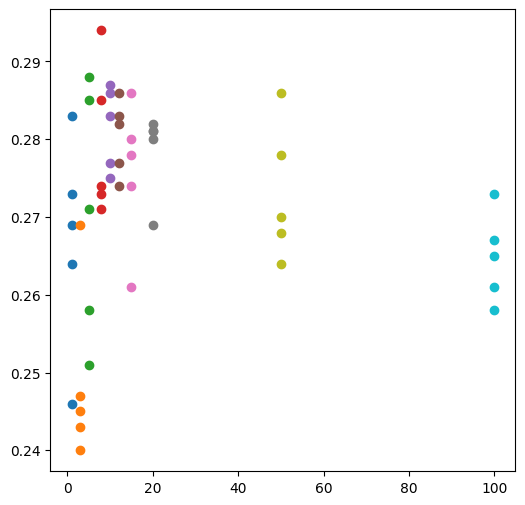

In [ ]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])

plot_scatter(scores)

We will create a box-plot for each hyperparameter `k`. To do that, we will find the mean and standard deviation of the `k_fold` scores of each hyperparameter `k`.

Use `np.mean` to get the average accuracy per kNN model. Note that you will need to use the `axis` parameter here. Your output should have a shape of `(10,)`

In [ ]:
# Write your code here
avg_scores = np.mean(scores, axis=1)


Use `np.std` to get the average accuracy per kNN model. Note that you will need to use the `axis` parameter here. Your output should also have a shape of `(10,)`

In [ ]:
# Write your code here
stddev_scores = np.std(scores, axis=1)


<!--crumb;chart;cifar cv plot-->

Text(0, 0.5, 'Cross-validation accuracy')

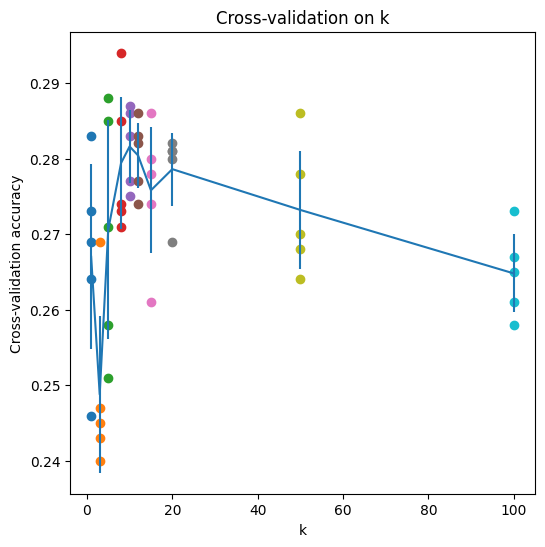

In [ ]:
plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

### Choosing the model with the best hyperparameter

Based on the cross-validation results above, choose the best value for k, retrain the classifier using all `5,000` training data, and test it on the `500` test data. You should be able to get above 28% accuracy on the test data.

<span style="color:red;">**Question 1-14:** What is the best hyperparameter `k`? Base this on the average score.</span>

Train your final `cifar` classifier with the best found hyperparameter `k` from cross-validation, and test it with `X_test`.

Instantiate a `KNeighborsClassifier` object. Set the number of neighbors to the value of the best `k`. Assign the object to variable `model`.

In [ ]:
# Write your code here
model = KNeighborsClassifier(n_neighbors=10)


Train the model.

In [ ]:
# Write your code here
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

Predict the classes of the test set and assign the return value to variable `y_predicted`.

In [ ]:
# Write your code here
y_predicted = model.predict(X_test)


Now, compute and display the accuracy of the model.

In [ ]:
# Write your code here
num_correct = sum(y_predicted == y_test)
num_test = len(y_test)
accuracy = accuracy_score(y_test, y_predicted)


In [ ]:
print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 141 / 500 correct => accuracy: 0.282000


<span style="color:red;">**Question 1-15:** What is the test accuracy of your best `cifar-10` kNN classifier? Limit to 2 decimal places.</span>

<span style="color:green;">**Question:** Why do you think KNN performed poorly on the `cifar-10` dataset?</span>

<span style="color:red;">**Question 1-16:** Think of a hypothetical `cifar-10` classifier that randomly guesses the class. Will your `cifar-10` kNN classifier do better or worse than this hypothetical classifier? Why or why not?</span>

A: The hypothetical classifier will randomly guess between the 10 classes which will give a ~10% accuracy. The kNN classifier performs better.

# Conclusion

Congratulations! You made your first machine learning model using sci-kit learn. Moreover, you have also gone through the whole training-validating-testing pipeline, and tried to create classifier with a real-world dataset!

kNN is not a powerful model, but it has its own use cases. As we try more complex models, we will be introduced to models with a longer training time but faster testing time -- a trait that is good if we want our end users to have faster predictions.

Lastly, do not worry if you struggled learning the terms used in this notebook. We will be visiting them again with the succeeding models.

## <center>fin</center>